In [18]:
from rake_nltk import Rake
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.text import Text
from nltk.corpus import stopwords
from dstb.language.visualizations import plot_word_cloud
from dstb.language.collocations import (
    collocation_2,
    collocation_3,
    collocation_4,
    collocation_measure_correlation,
    detailed_collocation_2,
)
from dstb.language.commons import TermExtraction
from naat.data import ROOT_PATH

In [3]:
naat_corpus = PlaintextCorpusReader(ROOT_PATH, r".*\.txt")
en_fileids = []
fr_fileids = []
for file in naat_corpus._fileids:
    if file[-7:-4] == "_en":
        en_fileids.append(file)
    elif file[-7:-4] == "_fr":
        fr_fileids.append(file)

In [4]:
stop_words = set(stopwords.words("french"))

naat_text = Text(naat_corpus.words(fr_fileids[0]))
naat_vocab = naat_text.vocab()

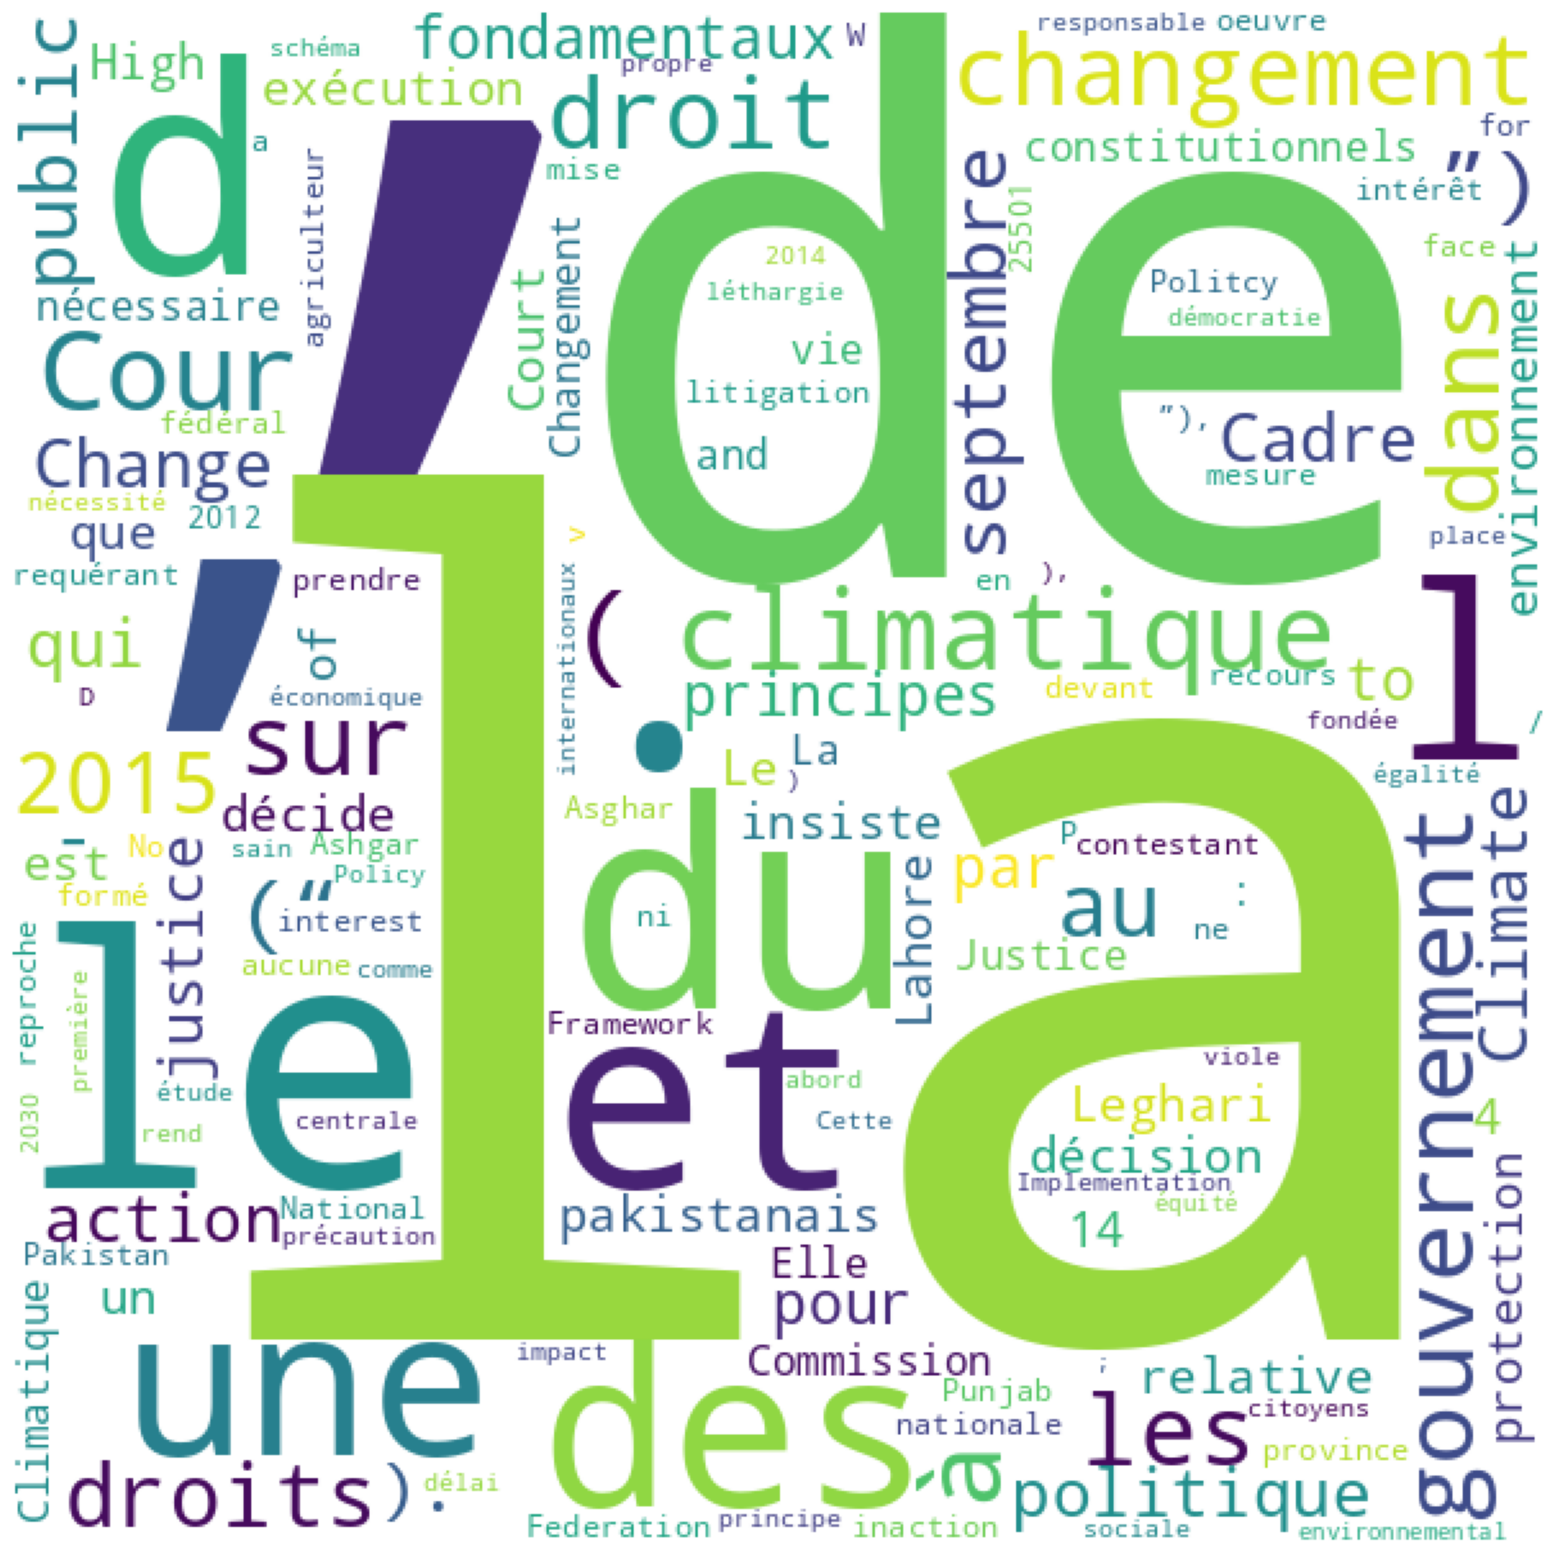

In [5]:
plot_word_cloud(naat_vocab)

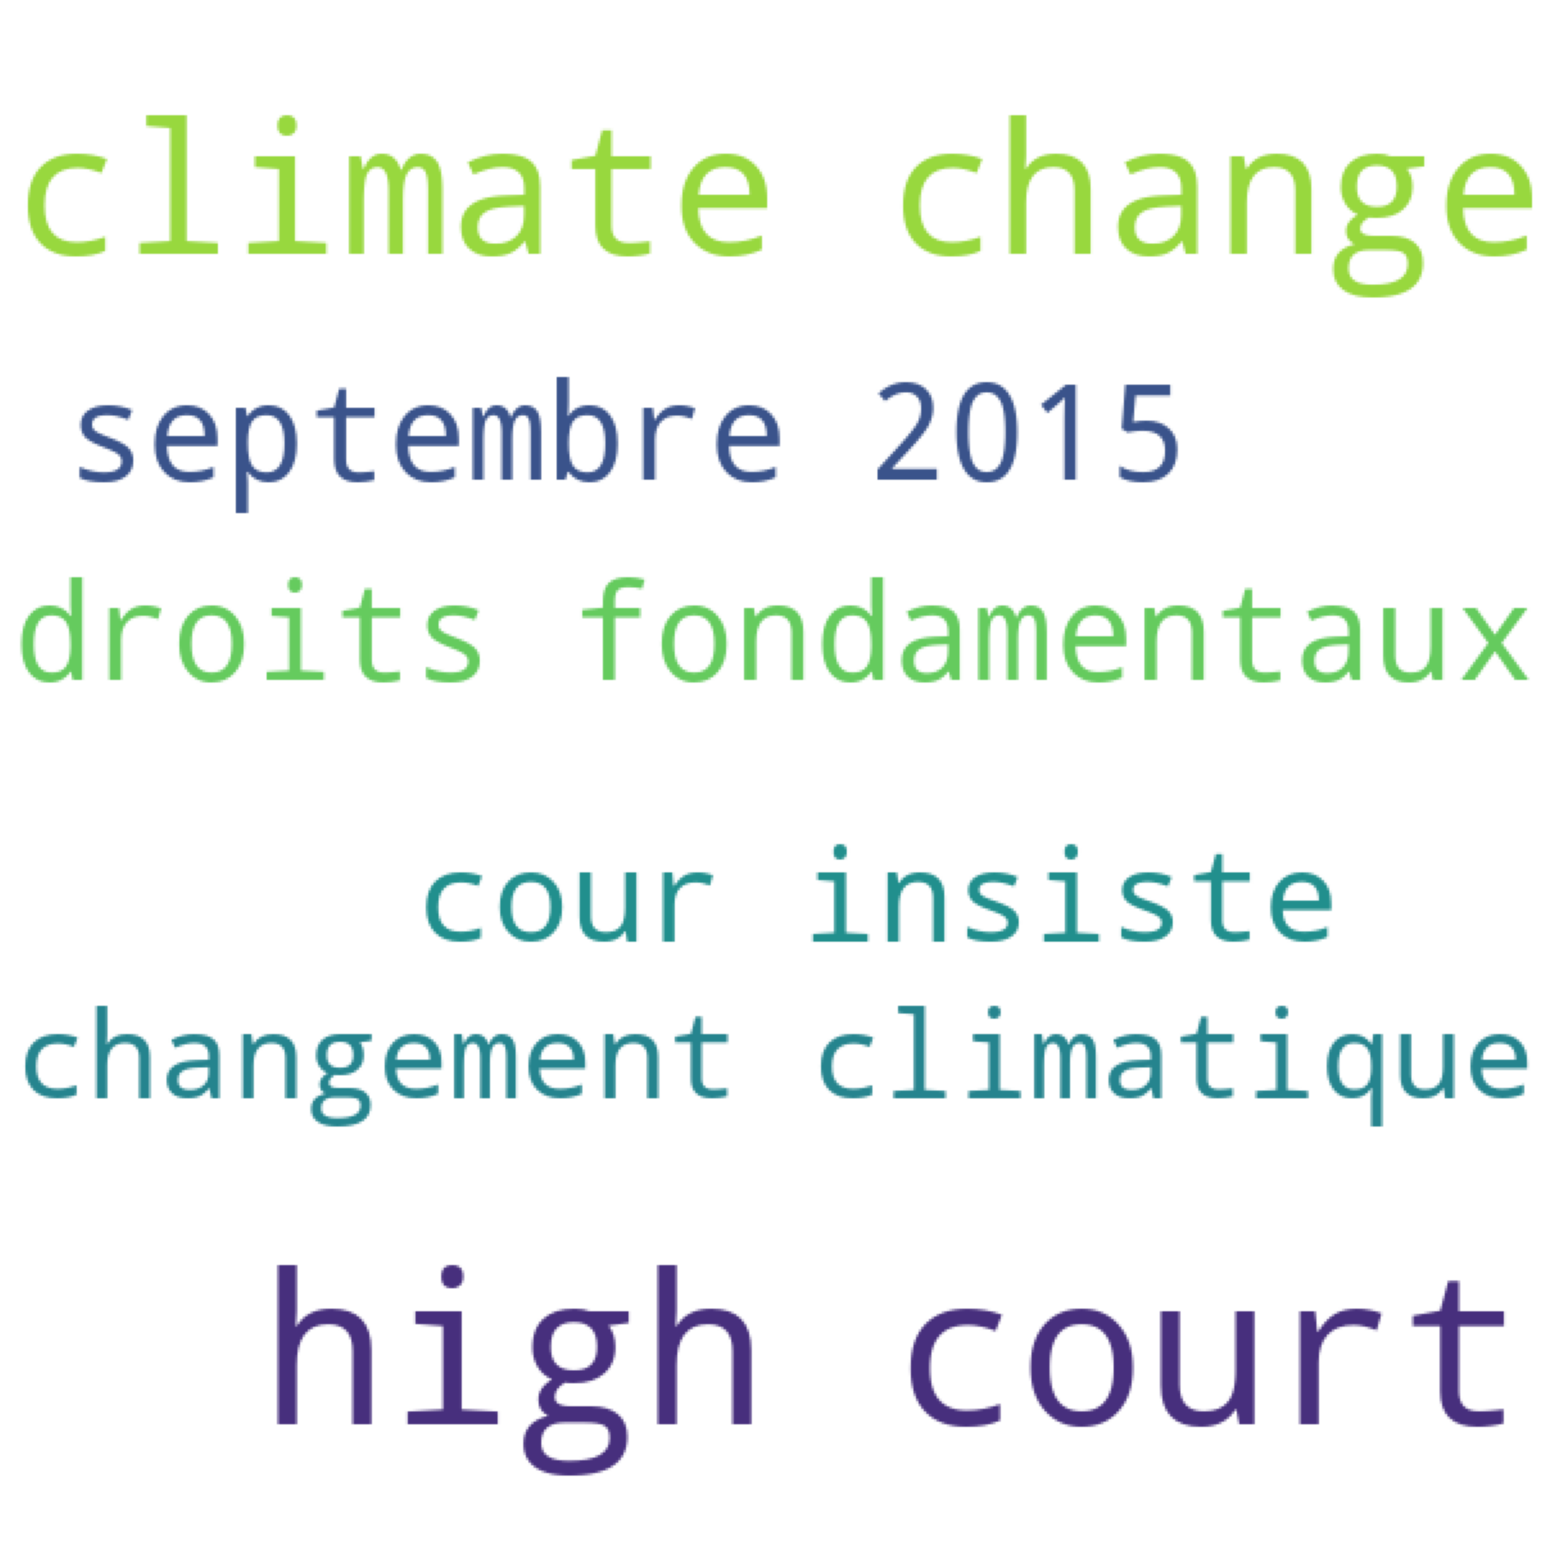

In [6]:

res = collocation_2(naat_text, method="pmi", stop_words=stop_words, window_size=2, num=80)
plot_word_cloud(res)

In [16]:
TermExtraction.configure({"language": "fr", "model_name": "fr_core_news_sm"})
term_extractor = TermExtraction(naat_corpus.raw()[:1000000])
res = term_extractor.cvalues()

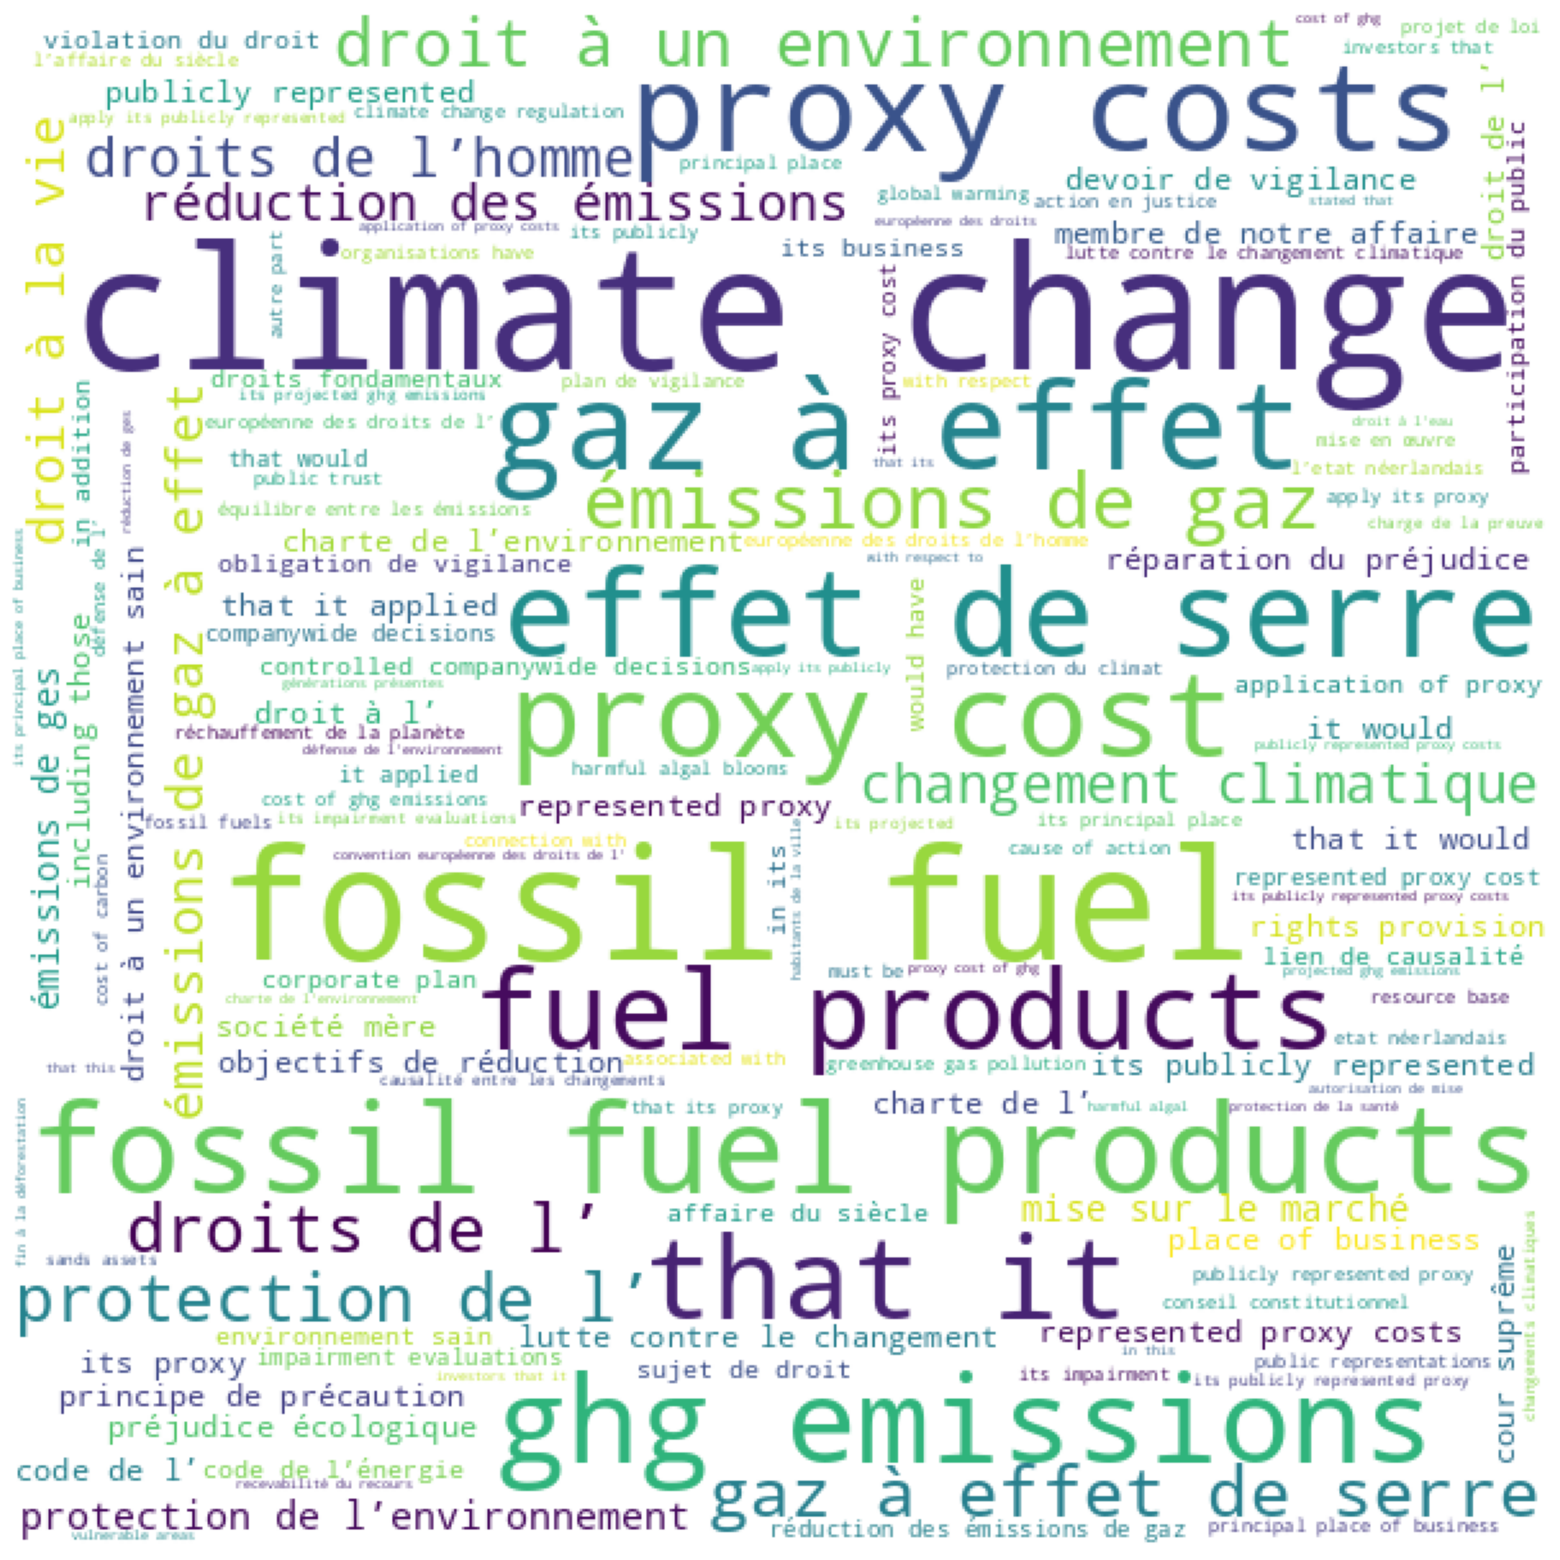

In [17]:
plot_word_cloud(res)

In [44]:
rake = Rake(stopwords=stop_words, language="fr", max_length=5)
paragraphs = [" ".join(sum(paragraph, [])) for paragraph in naat_corpus.paras(fr_fileids)]
rake.extract_keywords_from_sentences(paragraphs)

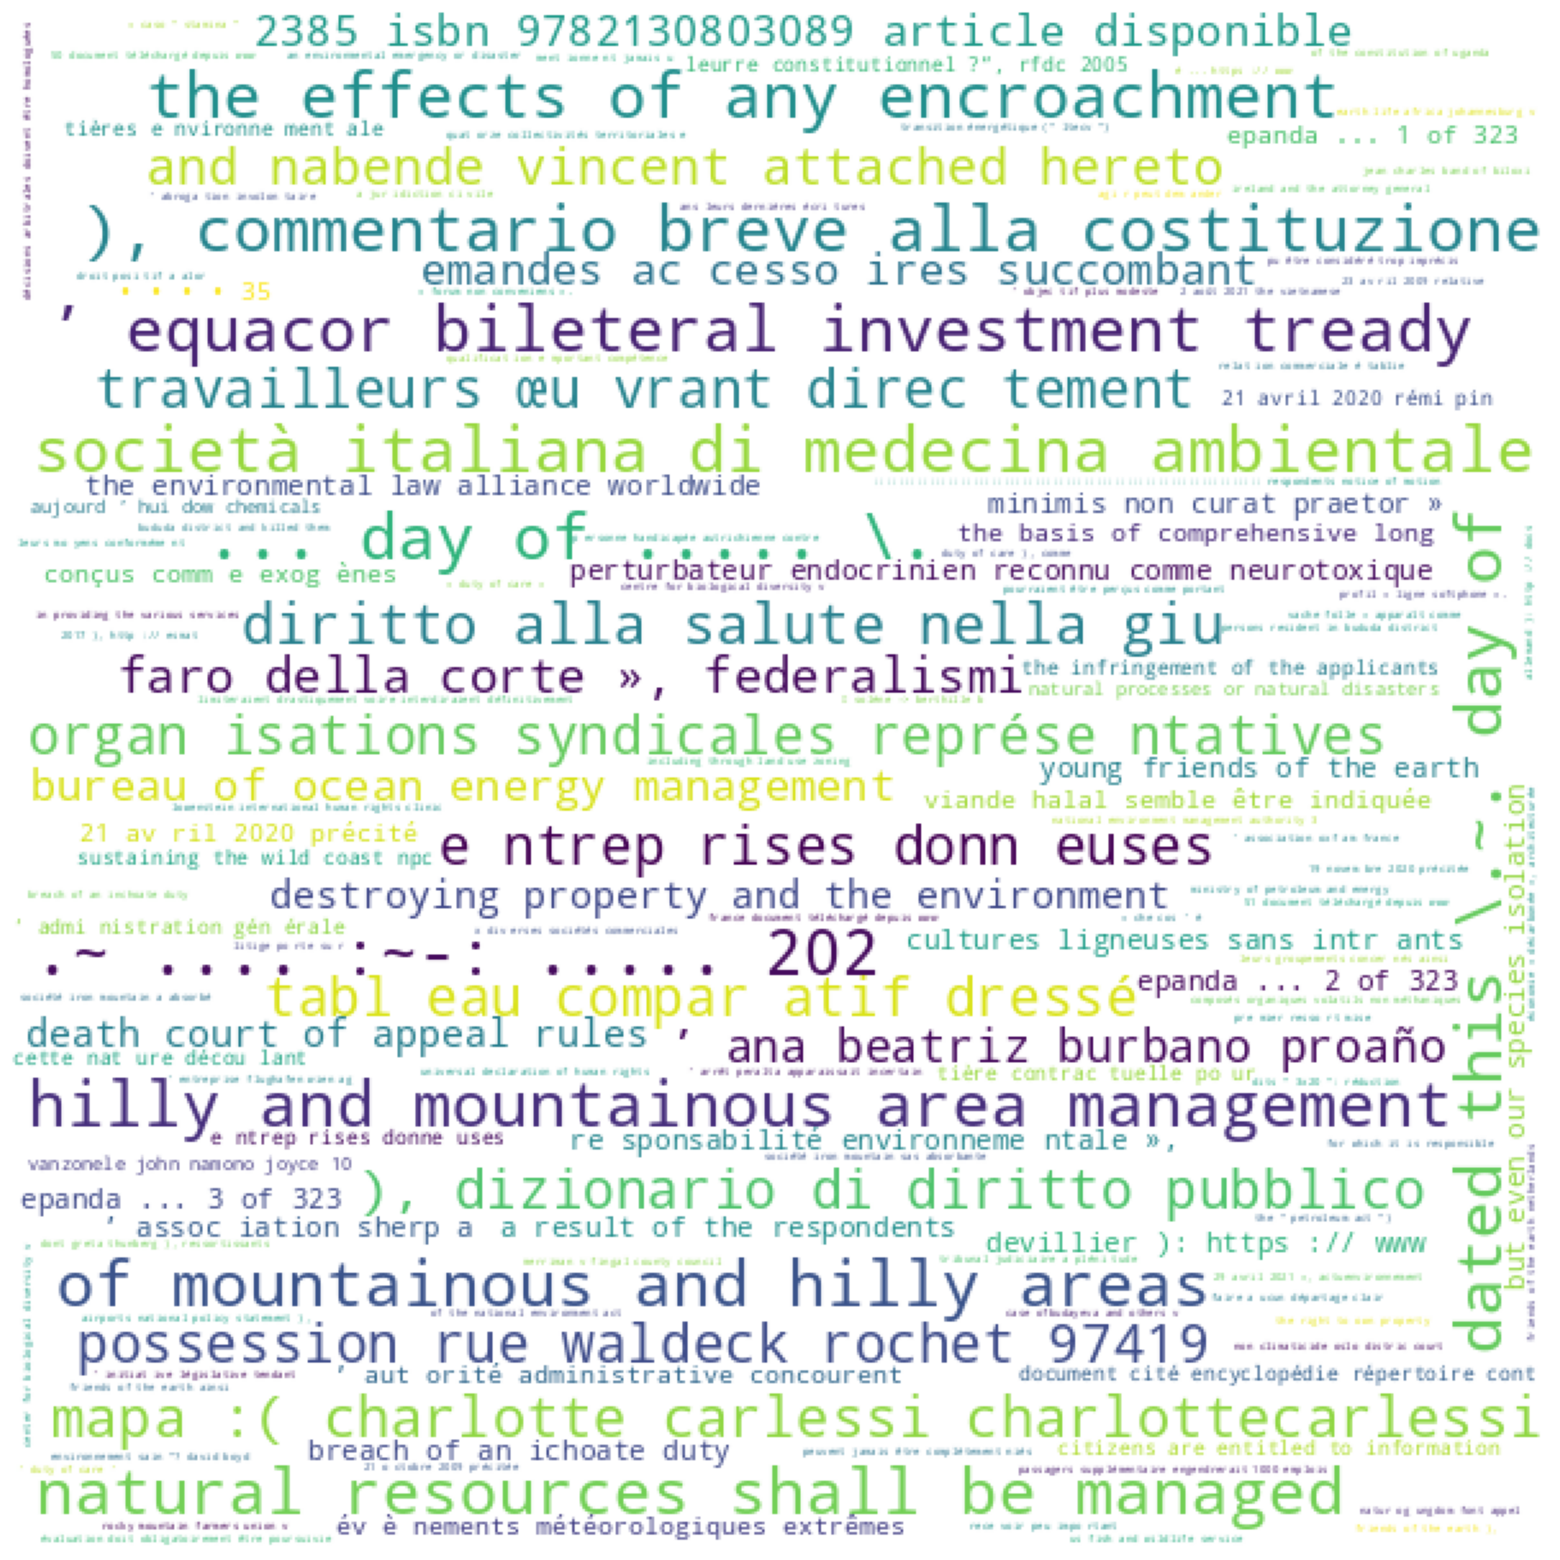

In [45]:
# To get keyword phrases ranked highest to lowest with scores.
phrases = rake.get_ranked_phrases_with_scores()
plot_word_cloud({phrase[1]: phrase[0] for phrase in phrases})